In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\NAUFAL
[nltk_data]     HAFIZH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
data=pd.read_csv('data/csv/cleaned/ta-citilink-clean.csv')
data.head

<bound method NDFrame.head of                                                   text  label
0    Sangat kecewa utk kemunduran jam kbrgktan mask...      0
1    Cancelled flight, input data whatsapp salah, i...      0
2    Tolong di training lagi itu pramugarinya atas ...      0
3    Seumur hidup cmn pernah beli tiket citilink 2x...      0
4    Jelek banget pelayanannya, sangat sangat kecew...      0
..                                                 ...    ...
487  Luar biasa on time saat keberangkatan dan kepu...      1
488  Citilink, favorit maskapai budget dalam negri ...      1
489  Luar biasa on time saat keberangkatan dan kepu...      1
490  Citilink, favorit maskapai budget dalam negri ...      1
491  Luar biasa on time saat keberangkatan dan kepu...      1

[492 rows x 2 columns]>

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    492 non-null    object
 1   label   492 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


In [13]:
print('Total Data : ',data.shape[0],' Data\n')
print('Terdiri Dari (Label) : ')
print('[0] Sentimen Negatif\t\t\t:',data[data.label==0].shape[0],' data')
print('[1] Sentimen Positif\t\t\t:',data[data.label==1].shape[0],' data')

Total Data :  492  Data

Terdiri Dari (Label) : 
[0] Sentimen Negatif			: 35  data
[1] Sentimen Positif			: 457  data


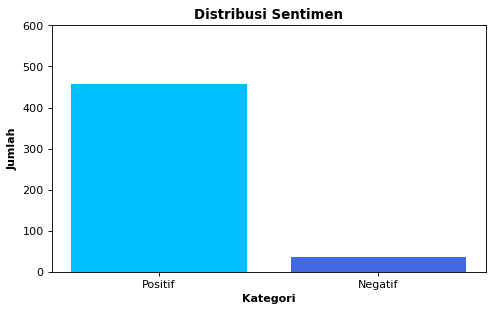

In [15]:
height=data['label'].value_counts()
labels=('Positif','Negatif')
y_pos=np.arange(len(labels))

plt.figure(figsize=(7,4),dpi=80)
plt.ylim(0,600)
plt.title('Distribusi Sentimen',fontweight='bold')
plt.xlabel('Kategori',fontweight='bold')
plt.ylabel('Jumlah',fontweight='bold')
plt.bar(y_pos,height,color=['deepskyblue','royalblue','skyblue'])
plt.xticks(y_pos,labels)
plt.show()

## TEXT PREPROCESSING

### CASE FOLDING

In [16]:
import re

#Create function for case folding sequence
def casefolding(text):
  text=text.lower()
  text=re.sub(r'https?://\S+|www\.\S+','',text)
  text=re.sub(r'[-+]?[0-9]+','',text)
  text=re.sub(r'[^\w\s]','',text)
  text=text.strip()
  return text

In [17]:
raw_sample=data['text'].iloc[22]
case_folding=casefolding(raw_sample)

print('Raw Data\t: ',raw_sample)
print('Case Folding\t: ',case_folding)

Raw Data	:  Kursinya sempit, Sandaran kirsi tegak 90°. Perjalanan 2 jam Medan Jakarta serasa 10 jam, badan pegel ga bisa senderan sedikitpun. Apalagi untuk tidur... Akhirnya tidur dengan rebahan kepala kedepan keatas meja lipat.  Not Recomended. *Kecewa*
Case Folding	:  kursinya sempit sandaran kirsi tegak  perjalanan  jam medan jakarta serasa  jam badan pegel ga bisa senderan sedikitpun apalagi untuk tidur akhirnya tidur dengan rebahan kepala kedepan keatas meja lipat  not recomended kecewa


### WORD NORMALIZATION

In [18]:
key_norm=pd.read_csv('https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv')

def text_normalize(text):
  text=' '.join([key_norm[key_norm['singkat']==word]['hasil'].values[0]if(key_norm['singkat']==word).any()else word for word in text.split()])
  text=str.lower(text)
  return text

### FILTERING (STOPWORD REMOVAL)

In [19]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind=stopwords.words('indonesian')

In [20]:
len(stopwords_ind)

758

In [21]:
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [22]:
more_stopword=['jt','kg','d'] # Adding more word in stopword list
stopwords_ind=stopwords_ind+more_stopword

def remove_stop_words(text):
  clean_words=[]
  text=text.split()
  for word in text:
    if word not in stopwords_ind:
      clean_words.append(word)
  return " ".join(clean_words)

In [23]:
raw_sample=data['text'].iloc[22]
case_folding=casefolding(raw_sample)
stopword_removal=remove_stop_words(case_folding)

print('Raw Data\t: ',raw_sample)
print('Case Folding\t: ',case_folding)
print('Stopword Removal\t: ',stopword_removal)

Raw Data	:  Kursinya sempit, Sandaran kirsi tegak 90°. Perjalanan 2 jam Medan Jakarta serasa 10 jam, badan pegel ga bisa senderan sedikitpun. Apalagi untuk tidur... Akhirnya tidur dengan rebahan kepala kedepan keatas meja lipat.  Not Recomended. *Kecewa*
Case Folding	:  kursinya sempit sandaran kirsi tegak  perjalanan  jam medan jakarta serasa  jam badan pegel ga bisa senderan sedikitpun apalagi untuk tidur akhirnya tidur dengan rebahan kepala kedepan keatas meja lipat  not recomended kecewa
Stopword Removal	:  kursinya sempit sandaran kirsi tegak perjalanan jam medan jakarta serasa jam badan pegel ga senderan sedikitpun tidur tidur rebahan kepala kedepan keatas meja lipat not recomended kecewa


### STEMMING

In [24]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory=StemmerFactory()
stemmer=factory.create_stemmer()

#Creating function for Indonesian stemming sequence
def stemming(text):
  text=stemmer.stem(text)
  return text

In [25]:
raw_sample = data['text'].iloc[22]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  Kursinya sempit, Sandaran kirsi tegak 90°. Perjalanan 2 jam Medan Jakarta serasa 10 jam, badan pegel ga bisa senderan sedikitpun. Apalagi untuk tidur... Akhirnya tidur dengan rebahan kepala kedepan keatas meja lipat.  Not Recomended. *Kecewa*
Case folding		:  kursinya sempit sandaran kirsi tegak  perjalanan  jam medan jakarta serasa  jam badan pegel ga bisa senderan sedikitpun apalagi untuk tidur akhirnya tidur dengan rebahan kepala kedepan keatas meja lipat  not recomended kecewa
Stopword removal	:  kursinya sempit sandaran kirsi tegak perjalanan jam medan jakarta serasa jam badan pegel ga senderan sedikitpun tidur tidur rebahan kepala kedepan keatas meja lipat not recomended kecewa
Stemming		:  kursi sempit sandar kirsi tegak jalan jam medan jakarta serasa jam badan gel ga sender sedikit tidur tidur rebah kepala depan atas meja lipat not recomended kecewa


### TEXT PREPROCESSING PIPELINE

In [26]:
def text_preprocessing_process(text):
  text=casefolding(text)
  text=text_normalize(text)
  text=remove_stop_words(text)
  text=stemming(text)
  return text

In [27]:
%%time
data['clean_teks']=data['text'].apply(text_preprocessing_process)

CPU times: total: 3min 4s
Wall time: 3min 12s


In [28]:
data

,text,label,clean_teks
0,Sangat kecewa utk kemunduran jam kbrgktan mask...,0,kecewa mundur jam kbrgktan maskapai buruk pesa...
1,"Cancelled flight, input data whatsapp salah, i...",0,cancelled flight input data whatsapp salah inp...
2,Tolong di training lagi itu pramugarinya atas ...,0,tolong training pramugari nama vivi lumban sok...
3,Seumur hidup cmn pernah beli tiket citilink 2x...,0,umur hidup cmn beli tiket citilink x nya kecew...
4,"Jelek banget pelayanannya, sangat sangat kecew...",0,jelek banget layan kecewa laku kru nya kru cek...
...,...,...,...
487,Luar biasa on time saat keberangkatan dan kepu...,1,on berangkat pulang padan harga layan kelas ny...
488,"Citilink, favorit maskapai budget dalam negri ...",1,citilink favorit maskapai budget negeri harga ...
489,Luar biasa on time saat keberangkatan dan kepu...,1,on berangkat pulang padan harga layan kelas ny...
490,"Citilink, favorit maskapai budget dalam negri ...",1,citilink favorit maskapai budget negeri harga ...


In [29]:
data.to_csv('data/csv/cleaned/ta_citilink_clean_data.csv')

In [30]:
X=data['clean_teks']
y=data['label']

In [31]:
X

0      kecewa mundur jam kbrgktan maskapai buruk pesa...
1      cancelled flight input data whatsapp salah inp...
2      tolong training pramugari nama vivi lumban sok...
3      umur hidup cmn beli tiket citilink x nya kecew...
4      jelek banget layan kecewa laku kru nya kru cek...
                             ...                        
487    on berangkat pulang padan harga layan kelas ny...
488    citilink favorit maskapai budget negeri harga ...
489    on berangkat pulang padan harga layan kelas ny...
490    citilink favorit maskapai budget negeri harga ...
491    on berangkat pulang padan harga layan kelas ny...
Name: clean_teks, Length: 492, dtype: object

In [32]:
y

0      0
1      0
2      0
3      0
4      0
      ..
487    1
488    1
489    1
490    1
491    1
Name: label, Length: 492, dtype: int64

### FEATURE EXTRACTION (TF-IDF & N-Gram)

In [33]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

vec_TF_IDF=TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(X)

x_tf_idf=vec_TF_IDF.transform(X)
pickle.dump(vec_TF_IDF.vocabulary_,open('ta-citilink-feature_tf-idf.pkl','wb'))

In [34]:
vec_TF_IDF.vocabulary_

{'kecewa': 921,
 'mundur': 1305,
 'jam': 829,
 'kbrgktan': 917,
 'maskapai': 1201,
 'buruk': 334,
 'pesan': 1501,
 'tiket': 2034,
 'undur': 2131,
 'mundurrrrrrrrrr': 1306,
 'burukkkkk': 335,
 'sekaliiii': 1765,
 'kecewaaaaa': 922,
 'berat': 250,
 'citilink': 397,
 'sgtt': 1827,
 'berhargaaaa': 255,
 'kasihan': 913,
 'orang': 1408,
 'tua': 2091,
 'mnngu': 1279,
 'bandara': 184,
 'brgkt': 318,
 'pagi': 1417,
 'kecewaaaaaaaa': 923,
 'cancelled': 351,
 'flight': 614,
 'input': 784,
 'data': 466,
 'whatsapp': 2184,
 'salah': 1708,
 'credit': 429,
 'card': 360,
 'kembali': 943,
 'dana': 455,
 'belit': 236,
 'tiga': 2032,
 'lempar': 1106,
 'tanggung': 1955,
 'poor': 1540,
 'customer': 442,
 'servis': 1822,
 'langsung': 1074,
 'tutup': 2111,
 'telepon': 1985,
 'bicara': 276,
 'selesai': 1776,
 'really': 1624,
 'hard': 707,
 'talk': 1945,
 'manager': 1187,
 'rober': 1675,
 'uang': 2113,
 'juta': 874,
 'digandolin': 513,
 'tolong': 2063,
 'training': 2070,
 'pramugari': 1552,
 'nama': 1318,
 'vi

In [35]:
print(len(vec_TF_IDF.get_feature_names()))

2219


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
print(vec_TF_IDF.get_feature_names())

['aamiin', 'abab', 'ac', 'acara', 'aceh', 'acnya', 'acung', 'ada', 'adasatu', 'add', 'adem', 'adi', 'adik', 'adil', 'admin', 'administrasi', 'afiliasi', 'aga', 'agama', 'agenda', 'agung', 'agus', 'agustus', 'ahli', 'ahmad', 'air', 'airasia', 'airbus', 'aircraft', 'aircrew', 'airline', 'airlines', 'airlinesrow', 'airport', 'airways', 'aisle', 'aitem', 'aja', 'ajaib', 'ajak', 'ajar', 'ajiib', 'aju', 'akal', 'akan', 'akhir', 'akhit', 'akibat', 'akses', 'aktif', 'aktifitas', 'aktihkan', 'aktivitas', 'aktual', 'aku', 'akurat', 'ala', 'alam', 'alami', 'alangkah', 'alas', 'alat', 'alhamdulillah', 'alhir', 'alias', 'alih', 'all', 'alternatif', 'ama', 'aman', 'amanaman', 'ambience', 'ambil', 'ampir', 'ampun', 'amri', 'an', 'ana', 'anak', 'anakanak', 'and', 'anda', 'andal', 'android', 'aneh', 'aneka', 'anggap', 'anggora', 'anggota', 'angin', 'angka', 'angkasa', 'angkat', 'angkut', 'angsur', 'anna', 'announcementnya', 'anouncement', 'anouncementnya', 'antah', 'antar', 'antrain', 'antre', 'antri',

In [37]:
x1=vec_TF_IDF.transform(X).toarray()
data_tabular_tf_idf=pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names())
data_tabular_tf_idf

,aamiin,abab,ac,acara,aceh,acnya,acung,ada,adasatu,add,...,yakann,yani,yasudah,yoga,yogyakarta,your,yup,zenvolution,zone,zonehihi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.080814,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
data_tabular_tf_idf.iloc[10:20,60:70]

,alas,alat,alhamdulillah,alhir,alias,alih,all,alternatif,ama,aman
10,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
11,0.092841,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.04548,0.085232
12,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
13,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
14,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
15,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
16,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
17,0.000000,0.198645,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
18,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
19,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000


### FEATURE SELECTION

In [39]:
x_train=np.array(data_tabular_tf_idf)
y_train=np.array(y)

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features=SelectKBest(chi2,k=2000)
X_kbest_features=chi2_features.fit_transform(x_train,y_train)

print('Original feature number : ',x_train.shape[1])
print('Reduced feature number : ',X_kbest_features.shape[1])

Original feature number :  2219
Reduced feature number :  2000


In [41]:
Data=pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data

,Nilai
0,0.009368
1,0.023156
2,1.959050
3,0.415078
4,0.057759
...,...
2214,0.012709
2215,0.017472
2216,0.025052
2217,0.018383


In [42]:
feature=vec_TF_IDF.get_feature_names()
feature

Data['Fitur']=feature
Data

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Nilai,Fitur
0,0.009368,aamiin
1,0.023156,abab
2,1.959050,ac
3,0.415078,acara
4,0.057759,aceh
...,...,...
2214,0.012709,your
2215,0.017472,yup
2216,0.025052,zenvolution
2217,0.018383,zone


In [43]:
Data.sort_values(by='Nilai',ascending=False)

,Nilai,Fitur
442,9.637323e+00,customer
829,9.137263e+00,jam
1633,7.960890e+00,refund
1965,7.771552e+00,tau
1963,7.166336e+00,tas
...,...,...
1108,4.634736e-05,lepas
7,3.390651e-05,ada
1755,2.907544e-05,sedia
1186,1.703886e-05,management


In [44]:
mask=chi2_features.get_support()
mask

array([False,  True,  True, ...,  True,  True,  True])

In [45]:
new_feature=[]
for bool, f in zip(mask,feature):
  if bool:
    new_feature.append(f)
  selected_feature=new_feature
selected_feature

['abab',
 'ac',
 'acara',
 'aceh',
 'acnya',
 'acung',
 'adasatu',
 'add',
 'adem',
 'adik',
 'adil',
 'admin',
 'administrasi',
 'afiliasi',
 'aga',
 'agama',
 'agenda',
 'agung',
 'agus',
 'agustus',
 'ahli',
 'ahmad',
 'air',
 'airasia',
 'airbus',
 'aircraft',
 'aircrew',
 'airline',
 'airlines',
 'airlinesrow',
 'airways',
 'aisle',
 'aitem',
 'aja',
 'ajaib',
 'ajar',
 'aju',
 'akan',
 'akhir',
 'akhit',
 'akibat',
 'akses',
 'aktif',
 'aktifitas',
 'aktihkan',
 'aktivitas',
 'aktual',
 'aku',
 'akurat',
 'ala',
 'alam',
 'alami',
 'alangkah',
 'alas',
 'alat',
 'alhamdulillah',
 'alhir',
 'alias',
 'alih',
 'all',
 'alternatif',
 'ama',
 'aman',
 'amanaman',
 'ambil',
 'ampir',
 'ampun',
 'amri',
 'an',
 'ana',
 'anak',
 'anakanak',
 'anda',
 'andal',
 'android',
 'aneh',
 'aneka',
 'anggap',
 'anggora',
 'anggota',
 'angin',
 'angka',
 'angkasa',
 'angkat',
 'angkut',
 'angsur',
 'announcementnya',
 'anouncement',
 'anouncementnya',
 'antah',
 'antar',
 'antrain',
 'antre',
 'a

In [46]:
new_selected_feature={}

for (k,v) in vec_TF_IDF.vocabulary_.items():
  if k in selected_feature:
    new_selected_feature[k]=v

new_selected_feature

{'kecewa': 921,
 'mundur': 1305,
 'jam': 829,
 'kbrgktan': 917,
 'maskapai': 1201,
 'buruk': 334,
 'pesan': 1501,
 'tiket': 2034,
 'undur': 2131,
 'mundurrrrrrrrrr': 1306,
 'burukkkkk': 335,
 'sekaliiii': 1765,
 'kecewaaaaa': 922,
 'berat': 250,
 'citilink': 397,
 'sgtt': 1827,
 'berhargaaaa': 255,
 'kasihan': 913,
 'orang': 1408,
 'tua': 2091,
 'mnngu': 1279,
 'bandara': 184,
 'brgkt': 318,
 'pagi': 1417,
 'kecewaaaaaaaa': 923,
 'cancelled': 351,
 'flight': 614,
 'input': 784,
 'data': 466,
 'whatsapp': 2184,
 'salah': 1708,
 'credit': 429,
 'card': 360,
 'kembali': 943,
 'dana': 455,
 'belit': 236,
 'tiga': 2032,
 'lempar': 1106,
 'tanggung': 1955,
 'poor': 1540,
 'customer': 442,
 'servis': 1822,
 'langsung': 1074,
 'tutup': 2111,
 'telepon': 1985,
 'bicara': 276,
 'selesai': 1776,
 'really': 1624,
 'hard': 707,
 'talk': 1945,
 'manager': 1187,
 'rober': 1675,
 'uang': 2113,
 'juta': 874,
 'digandolin': 513,
 'tolong': 2063,
 'training': 2070,
 'pramugari': 1552,
 'nama': 1318,
 'vi

In [47]:
len(new_selected_feature)

2000

In [53]:
pickle.dump(new_selected_feature,open('ta-citilink-selected_feature_tf-idf.sav','wb'))

In [54]:
data_selected_feature=pd.DataFrame(X_kbest_features,columns=selected_feature)
data_selected_feature

,abab,ac,acara,aceh,acnya,acung,adasatu,add,adem,adik,...,yak,yakann,yani,yasudah,yogyakarta,your,yup,zenvolution,zone,zonehihi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.080814,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
data_selected_feature.iloc[10:20,60:70]

,alternatif,ama,aman,amanaman,ambil,ampir,ampun,amri,an,ana
10,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
11,0.0,0.04548,0.085232,0.0,0.098873,0.000000,0.0,0.0,0.0,0.0
12,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
13,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
14,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
15,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
16,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
17,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
18,0.0,0.00000,0.000000,0.0,0.000000,0.274212,0.0,0.0,0.0,0.0
19,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [56]:
selected_x=X_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### MODELLING (MACHINE LEARNING)

In [57]:
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [58]:
x=selected_x
y=data.label
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [59]:
print('Banyak data x_train : ',len(x_train))
print('Banyak data x_test : ',len(x_test))
print('Banyak data y_train : ',len(y_train))
print('Banyak data y_test : ',len(y_test))

Banyak data x_train :  393
Banyak data x_test :  99
Banyak data y_train :  393
Banyak data y_test :  99


In [60]:
from datetime import datetime
start_time=datetime.now()

text_algorithm=MultinomialNB()
model=text_algorithm.fit(x_train,y_train)

filename='model_sentiment_naivechi-ta-citilink.sav'
pickle.dump(model,open(filename,'wb'))

end_time=datetime.now()
result_time=end_time-start_time
print("Duration : ",result_time)

Duration :  0:00:00.015990


In [61]:
predicted=model.predict(x_test)
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### MODEL EVALUATION

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

NewprediksiBenar=(predicted==y_test).sum()
NewprediksiSalah=(predicted!=y_test).sum()

print('Prediksi Benar : ',NewprediksiBenar,'Data')
print('Prediksi Salah : ',NewprediksiSalah,'Data')
print('Akurasi Algoritma : ',NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,'%')

CM=confusion_matrix(y_test,predicted)

TN=CM[0][0]
FN=CM[1][0]
TP=CM[1][1]
FP=CM[0][1]
precision=TP/(TP+FP)
recall=TP/(TP+FN)

print ("TRUE NEGATIVE (TN):",TN)
print ("FALSE NEGATIVE (FN):",FN)
print ("TRUE POSITIVE (TP):",TP)
print ("FALSE POSITIVE (FP):",FP)
print ("PRECISION:",precision*100,"%")
print ("RECALL:",recall*100,"%")

print(classification_report(y_test,predicted))

Prediksi Benar :  92 Data
Prediksi Salah :  7 Data
Akurasi Algoritma :  92.92929292929293 %
TRUE NEGATIVE (TN): 0
FALSE NEGATIVE (FN): 0
TRUE POSITIVE (TP): 92
FALSE POSITIVE (FP): 7
PRECISION: 92.92929292929293 %
RECALL: 100.0 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.93      1.00      0.96        92

    accuracy                           0.93        99
   macro avg       0.46      0.50      0.48        99
weighted avg       0.86      0.93      0.90        99



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
# Using Cross Validation to validating data

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=2)
accuracy=(cross_val_score(model,x,y,cv=cv,scoring='accuracy'))
score_accuracy=np.mean(accuracy)
print('Accuracy : ',accuracy)
print('Accuracy : ',score_accuracy)

Accuracy :  [0.91919192 0.91919192 0.95959596 0.93939394 0.93939394 0.93939394
 0.94949495 0.92929293 0.92929293 0.95959596]
Accuracy :  0.9383838383838384


In [64]:
import pickle

pipeline=pickle.load(open('model_sentiment_naivechi-ta-citilink.sav','rb'))

data_input=input("Masukan Sentimen:\n")
data_input=text_preprocessing_process(data_input)

loaded_vec=TfidfVectorizer(decode_error="replace",vocabulary=set(pickle.load(open('ta-lion-selected_feature_tf-idf.sav','rb'))))
hasil=pipeline.predict(loaded_vec.fit_transform([data_input]))

if(hasil==0):
  s="Sentimen Negatif"
else:
  s="Sentimen Positif"

print("Hasil Prediksi :\n",s)

Hasil Prediksi :
 Sentimen Positif


In [65]:
filename="model-ta-citilink.sav"
pickle.dump(hasil,open(filename,'wb'))